<img src="http://www.astropy.org/images/astropy_banner.svg" alt="Drawing" style="width: 400px;"/>

# Introduction à [Astropy](http://www.astropy.org/)

### [Astropy](http://docs.astropy.org/en/stable/)

- Librairie centrale et unique contenant les élément essentiels des analyses pour l'astronomie, et ayant pour but de rendre possible l'inter-operabilité des librairies d'astronomies.
- Les fonctionnalités principales d'astropy se font selon trois catégories principales
  - Data structures and transformations (constantes, unitées, temps, coordonnées, WCS, table, etc)
  - Files, I/O, and Communication (FITS, ASCII, VOTable, HDF5, YAML, etc.)
  - Computations and utilities (cosmologie, astr-statistique, visualisation, convolution, filtering)
- [Documentation en ligne](http://docs.astropy.org/en/stable/)

#### Data structures and transformations

- Constants (astropy.constants)
- Units and Quantities (astropy.units)
- N-dimensional datasets (astropy.nddata)
- Data Tables (astropy.table)
- Time and Dates (astropy.time)
- Astronomical Coordinate Systems (astropy.coordinates)
- World Coordinate System (astropy.wcs)
- Models and Fitting (astropy.modeling)
- Analytic Functions (astropy.analytic_functions)

#### Files, I/O, and Communication

- Unified file read/write interface
- FITS File handling (astropy.io.fits)
- ASCII Tables (astropy.io.ascii)
- VOTable XML handling (astropy.io.votable)
- Miscellaneous: HDF5, YAML, pickle (astropy.io.misc)
- Simple Application Messaging Protocol (astropy.samp)
- Virtual Observatory Access (astropy.vo)

#### Computations and utilities

- Cosmological Calculations (astropy.cosmology)
- Convolution and filtering (astropy.convolution)
- Data Visualization (astropy.visualization)
- Astrostatistics Tools (astropy.stats)

## Exemple 1

In [1]:
# Téléchargement des données en ligne
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits',
                           cache=True)

In [2]:
# Explore la structure du fichier teléchargé grâce à io.fits.info()
from astropy.io import fits
fits.info(image_file)

Filename: /home/chotard/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [3]:
# Récupération des données dans l'extension 0 du fichier fits (Primary HDU)
image_data = fits.getdata(image_file, ext=0)

In [4]:
# L'image est en fait un `numpy array` à 2 dimensions
print(image_data.shape)

(893, 891)


<IPython.core.display.Javascript object>


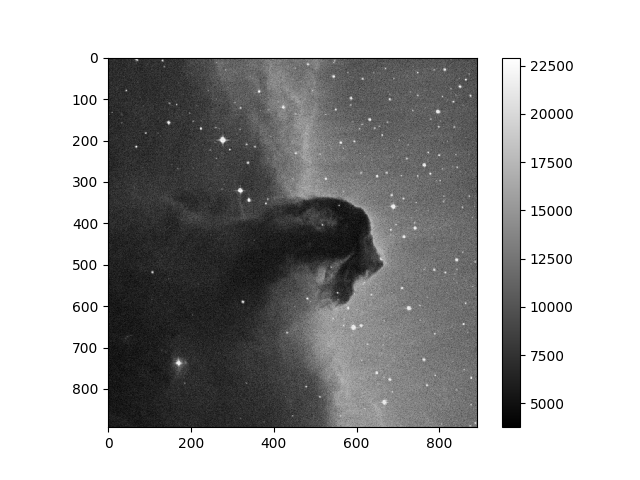

In [5]:
# Visualisation de l'image avec matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

## Exemple 2

In [6]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [7]:
cluster_3C295 = SkyCoord.from_name('3C295')
cluster_3C295

<SkyCoord (ICRS): (ra, dec) in deg
    ( 212.835495,  52.20277)>

In [8]:
cluster_3C295.ra, cluster_3C295.dec

(<Longitude 212.835495 deg>, <Latitude 52.20277 deg>)

In [9]:
cluster_3C295.ra.arcmin, cluster_3C295.dec.degree

(12770.129700000001, 52.20277)

In [10]:
SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [11]:
SkyCoord(10.625, 41.2, frame='icrs', unit='deg')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [12]:
SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [13]:
SkyCoord('00h42.5m', '+41d12m')

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [14]:
SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

In [15]:
SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

<SkyCoord (ICRS): (ra, dec) in deg
    ( 10.625,  41.2)>

# Exemple 3

In [16]:
from astropy.table import Table
a = [1, 4, 5]
b = [2.0, 5.0, 8.2]
c = ['x', 'y', 'z']
t = Table([a, b, c], names=('a', 'b', 'c'), meta={'name': 'first table'})
t.show_in_notebook()

idx,a,b,c
0,1,2.0,x
1,4,5.0,y
2,5,8.2,z


#### Récupérer la première ligne, ou la colonne 'a'

In [17]:
t[0]

a,b,c
int64,float64,str1
1,2.0,x


In [18]:
t['a']
t.columns[0]

1
4
5


In [19]:
t['a'] == t.columns[0]

array([ True,  True,  True], dtype=bool)

#### Ajouter une colonne

In [20]:
from astropy.table import Column
t.add_column(Column([[1,2,3], [4,5,6], [7,8,9]], name='list', dtype=list))
t

a,b,c,list [3]
int64,float64,str1,object
1,2.0,x,1 .. 3
4,5.0,y,4 .. 6
5,8.2,z,7 .. 9


#### Appliquer un filtre sur tout le table

In [21]:
t[t['b'] > 3]

a,b,c,list [3]
int64,float64,str1,object
4,5.0,y,4 .. 6
5,8.2,z,7 .. 9
